  >                                Capstone Project [Syarah] 


# Set up 

## Libraries Importing

In [87]:
#set up & Import 
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
from matplotlib import style
import squarify
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
import requests # url 
from IPython.display import HTML # HTML enable
from sklearn.preprocessing import StandardScaler

import sklearn # scikit-learn kutubxonasi
import seaborn as sns # statistical graphics
import plotly.express as px #plotting


### For ML SKLearn ###
# for Regression: 
from sklearn.linear_model import LinearRegression #for simple linear regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.model_selection import train_test_split #to split the dataset for ML
from sklearn.metrics import mean_absolute_error #cost function MAE 
from sklearn.metrics import mean_squared_error #cost function MSE
from sklearn.metrics import r2_score #cost function R2 Score 
from sklearn.model_selection import cross_val_score #cross value score 
from sklearn.model_selection import GridSearchCV #grid search CV 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

 # for Classifications:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.inspection import DecisionBoundaryDisplay

#import lightgbm as lgb
#from sklearn import ensemble

## Dataset

In [4]:
# step 1 importing the dataset  UCD = Used Cars Dataset
UCD_Clean = 'UsedCarsSA_Clean_EN.csv' 
df = pd.read_csv(UCD_Clean)

# Preprocessing 

## Inital Analysis

In [148]:
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


In [4]:
# counting 
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8035 rows and 13 columns


In [5]:
df.describe(exclude='number')

,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region,Negotiable
count,8035,8035,8035,8035,8035,8035,8035,8035,8035
unique,59,381,4,15,3,3,2,27,2
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh,False
freq,2038,372,5962,3478,3193,7861,6971,3237,5509


### Unique Values

In [7]:
df.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable'],
      dtype='object')

In [8]:
df['Make'].unique()

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'GMC',
       'Chevrolet', 'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'Mazda',
       'Ford', 'Kia', 'Genesis', 'Cadillac', 'Geely', 'MG', 'Jeep',
       'INFINITI', 'Dodge', 'Ferrari', 'Great Wall', 'Jaguar', 'GAC',
       'Renault', 'Suzuki', 'Peugeot', 'Changan', 'HAVAL', 'BMW',
       'Rolls-Royce', 'Porsche', 'Mitsubishi', 'Isuzu', 'Subaru',
       'Zhengzhou', 'Lincoln', 'Volkswagen', 'Daihatsu', 'FAW', 'Chery',
       'Audi', 'Bentley', 'Aston Martin', 'Mercury', 'Fiat', 'BYD',
       'Classic', 'Hummer', 'Other', 'Maserati', 'SsangYong', 'Lifan',
       'Foton', 'Tata', 'Victory Auto', 'Škoda', 'Iveco'], dtype=object)

In [9]:
df['Make'].value_counts('normalize')

Toyota          0.253640
Hyundai         0.117113
Ford            0.094960
Chevrolet       0.080149
Nissan          0.068202
GMC             0.049782
Kia             0.044431
Lexus           0.042688
Mercedes        0.040821
Mazda           0.022900
Honda           0.022775
BMW             0.016428
Mitsubishi      0.015557
Dodge           0.015059
Land Rover      0.012197
Jeep            0.009583
Chrysler        0.008836
Genesis         0.006845
Renault         0.006845
Changan         0.006721
Audi            0.006472
Cadillac        0.005725
Isuzu           0.005103
Porsche         0.004107
MG              0.003858
Volkswagen      0.003609
Geely           0.003485
INFINITI        0.002862
Lincoln         0.002738
Suzuki          0.002738
HAVAL           0.002365
Daihatsu        0.001991
Mercury         0.001867
Peugeot         0.001867
Other           0.001867
MINI            0.001867
Jaguar          0.001742
Fiat            0.001493
Maserati        0.000996
Hummer          0.000996


In [11]:
df['Type'].value_counts('normalize')

Land Cruiser    0.046297
Camry           0.040946
Hilux           0.036092
Accent          0.031114
Yukon           0.028625
                  ...   
LF X60          0.000124
Crown           0.000124
Koranado        0.000124
Prius           0.000124
Galant          0.000124
Name: Type, Length: 381, dtype: float64

In [12]:
df['Year'].unique()

array([2018, 2016, 2019, 2011, 2009, 2017, 2014, 2020, 2021, 2008, 2015,
       2013, 1993, 2012, 2010, 2006, 2007, 1992, 2001, 1982, 2003, 1996,
       1997, 1999, 2022, 2005, 1984, 1995, 2002, 2000, 1998, 1991, 2004,
       1986, 1983, 1994, 1989, 1990, 1979, 1985, 1988, 1980, 1987, 1964,
       1963, 1981, 1965, 1972, 1970, 1978, 1975, 1977])

In [13]:
df['Engine_Size'].value_counts('normalize')

3.5    0.091848
2.0    0.080398
2.5    0.077785
1.6    0.074673
2.4    0.068451
         ...   
5.1    0.000124
5.9    0.000124
7.8    0.000124
8.2    0.000124
7.2    0.000124
Name: Engine_Size, Length: 75, dtype: float64

In [14]:
df['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

In [15]:
df['Origin'].value_counts('normalize')
#unknown to be added to others

Saudi          0.742004
Gulf Arabic    0.125202
Other          0.122091
Unknown        0.010703
Name: Origin, dtype: float64

In [16]:
df['Color'].unique()
#as checked on Sayarah bronze and gold are used interchangebly
#oily to be changed to olive green
#another color to other

array(['Black', 'White', 'Silver', 'Grey', 'Navy', 'Bronze', 'Red',
       'Another Color', 'Golden', 'Brown', 'Blue', 'Oily', 'Green',
       'Orange', 'Yellow'], dtype=object)

In [17]:
df['Color'].value_counts('normalize')

White            0.432856
Black            0.116241
Silver           0.110890
Grey             0.089110
Another Color    0.066584
Brown            0.040199
Red              0.034848
Golden           0.028002
Blue             0.027629
Navy             0.019913
Bronze           0.019788
Oily             0.006347
Green            0.004729
Yellow           0.001618
Orange           0.001245
Name: Color, dtype: float64

In [18]:
df['Options'].unique()

array(['Full', 'Standard', 'Semi Full'], dtype=object)

In [19]:
df['Options'].value_counts()

Full         3193
Standard     2610
Semi Full    2232
Name: Options, dtype: int64

In [20]:
 df['Engine_Size'].unique()
    #to further check engines below 2 and more than 5.7

array([5.7, 4.8, 1.5, 1.6, 2. , 4.5, 3.6, 2.5, 5.6, 5.3, 4. , 2.4, 3.5,
       3. , 2.6, 5.4, 4.6, 3.8, 1.4, 3.3, 1.8, 4.3, 6. , 1. , 2.7, 5. ,
       6.2, 4.7, 8. , 7.5, 2.3, 3.7, 1.2, 8.8, 1.1, 4.4, 2.8, 1.3, 1.7,
       5.5, 6.6, 6.4, 7. , 2.1, 3.2, 5.2, 3.1, 3.4, 5.8, 4.1, 6.5, 9. ,
       4.2, 6.3, 8.9, 6.1, 2.2, 6.7, 8.1, 6.9, 4.9, 6.8, 2.9, 8.5, 8.3,
       7.4, 1.9, 7.9, 3.9, 5.1, 5.9, 8.7, 7.8, 8.2, 7.2])

In [21]:
df['Engine_Size'].value_counts('normalize')

3.5    0.091848
2.0    0.080398
2.5    0.077785
1.6    0.074673
2.4    0.068451
         ...   
5.1    0.000124
5.9    0.000124
7.8    0.000124
8.2    0.000124
7.2    0.000124
Name: Engine_Size, Length: 75, dtype: float64

In [22]:
df['Fuel_Type'].unique()

array(['Gas', 'Diesel', 'Hybrid'], dtype=object)

In [23]:
df['Fuel_Type'].value_counts('normalize')

Gas       0.978345
Diesel    0.018793
Hybrid    0.002862
Name: Fuel_Type, dtype: float64

In [24]:
df['Gear_Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [25]:
df['Gear_Type'].value_counts('normalize')

Automatic    0.867579
Manual       0.132421
Name: Gear_Type, dtype: float64

In [26]:
df['Mileage'].unique()

array([ 103000,    5448,   72418, ..., 3275230,  497480,  222835])

In [27]:
df['Mileage'].value_counts('normalize')

300000    0.015059
200000    0.011574
300       0.008339
100000    0.007592
90000     0.006223
            ...   
435000    0.000124
65325     0.000124
122084    0.000124
139806    0.000124
222835    0.000124
Name: Mileage, Length: 2175, dtype: float64

In [28]:
df['Region'].unique()

array(['Riyadh', 'Jeddah', 'Dammam', 'Al-Medina', 'Qassim', 'Makkah',
       'Jazan', 'Tabouk', 'Aseer', 'Hail', 'Taef', 'Al-Ahsa', 'Abha',
       'Hafar Al-Batin', 'Sabya', 'Besha', 'Khobar', 'Al-Baha', 'Yanbu',
       'Al-Namas', 'Jubail', 'Najran', 'Al-Jouf', 'Arar', 'Wadi Dawasir',
       'Qurayyat', 'Sakaka'], dtype=object)

In [68]:
df['City'].value_counts()

Riyadh            2256
Dammam            1111
Jeddah             757
Al-Medina          161
Qassim             154
Al-Ahsa            154
Makkah             125
Aseer              122
Tabouk              65
Taef                61
Khobar              60
Jazan               51
Jubail              48
Abha                39
Hail                29
Hafar Al-Batin      25
Al-Baha             23
Yanbu               20
Najran              19
Al-Jouf             16
Al-Namas            12
Arar                11
Besha                6
Wadi Dawasir         5
Qurayyat             5
Sakaka               4
Sabya                2
Name: City, dtype: int64

In [31]:
df['Price'].describe()

count    8.035000e+03
mean     5.369984e+04
std      7.198472e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.700000e+04
75%      7.375000e+04
max      1.150000e+06
Name: Price, dtype: float64

In [32]:
df['Negotiable'].unique()

array([False,  True])

In [33]:
df['Negotiable'].value_counts('normalize')

False    0.685625
True     0.314375
Name: Negotiable, dtype: float64

## Cleaning

In [5]:
# Checking for duplicated rows and droping
print("Number of duplicate rows: ", sum(df.duplicated()))
df.drop_duplicates(inplace=True)

Number of duplicate rows:  3


Since we have negotiable deals with 0 in the price column we will drop this column 

In [6]:
df=df.drop(['Negotiable'], axis=1)
df.shape

(8032, 12)

For the 'Make' column we noticed that we have two values that are not a known brand name
so we will drop those rows = 10

In [7]:
df = df[df.Make != 'Classic']
df = df[df.Make != 'Other']
df.shape

(8015, 12)

In the Type column we have "other" so in the same manner we will drop these rows = 13

In [8]:
df = df[df.Type != 'Other']
df.shape

(7989, 12)

we drop all deals with unrealistic millage >600,000 km

In [9]:
df = df[df.Mileage <=600_000]
df.shape

(7915, 12)

Dropping unrealistic engine size of more than 8L 

In [10]:
df = df[df.Engine_Size <=8]
df.shape

(7879, 12)

After checking some of the deals we noticed that there are some unrealsistic prices for some cars so we drop deals with prices less than 5,000 as these deals are enterd incorrectly or outliers. for the sake of classification we will keep 0 prices to indicate that those deals are negotiable deals.

In [11]:
df.drop(df[(df['Price']<5000) & (df['Price']!=0)].index,inplace=True)
df.shape

(7786, 12)

### Renaming Columns

In [12]:
#To make features clearer to understand we rename the following columns
df = df.rename(columns={"Make": "Brand","Origin":"Specs","Region":"City","Type":"Model"})

In [11]:
df.head()

,Brand,Model,Year,Specs,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,City,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500


### Replacing

In [13]:
df['Specs'] = df['Specs'].replace('Unknown','Other')
df['Specs'] = df['Specs'].replace('Gulf Arabic','GCC')

df['Color'] = df['Color'].replace('Bronze','Golden')
df['Color'] = df['Color'].replace('Golden','Gold')
df['Color'] = df['Color'].replace('Oily','Olive Green')
df['Color'] = df['Color'].replace('Another Color','Other')

### Numerical Classification

In [14]:
Car_Age = df['Year'].map(
    lambda Age: 'New' if Age >=2020 else '2010s' if Age >=2010 else '2000s' \
    if Age >= 2000 else '90s' if Age >=1990 else "Antique"
)
df['Car_Age']=Car_Age
df['Car_Age'].value_counts('normalize')

2010s      0.763550
2000s      0.119959
New        0.089263
90s        0.020935
Antique    0.006293
Name: Car_Age, dtype: float64

In [15]:
Mileage_Classfication = df['Mileage'].map(
    lambda Mileage: 'Very Low' if Mileage <=5_000 else 'Low' if Mileage <=50_000 else 'Medium' \
    if Mileage <=100_000 else 'High' if Mileage <=200_000 else "Very High"
)
df['Mileage_Classfication']=Mileage_Classfication
df['Mileage_Classfication'].value_counts('normalize')

High         0.279219
Very High    0.225405
Medium       0.203314
Low          0.153994
Very Low     0.138068
Name: Mileage_Classfication, dtype: float64

In [16]:
Engine_Classification = df['Engine_Size'].map(
    lambda Size: 'Small' if Size <=2.0 else 'Medium' if Size <=3.5 else 'Big'
)
df['Engine_Classification']=Engine_Classification
df['Engine_Classification'].value_counts('normalize')

Big       0.368610
Medium    0.357565
Small     0.273825
Name: Engine_Classification, dtype: float64

In [17]:
Region = df['City'].map(
    lambda part: 'Center' if (part =='Riyadh') | (part =='Qassim')| (part == 'Wadi Dawsir')  else 'East' if \
     (part == 'Dammam')| (part == 'Al-Ahsa') | (part == 'Hafar Al-Batin') | (part == 'Khobar') \
    | (part == 'Jubail') else 'West' if (part == 'Jeddah') | (part =='Al-Medina') | (part == 'Makkah') \
    | (part == 'Taef') | (part == 'Yanbu') else 'South' if (part =="jazan") | (part == 'Aseer')\
    | (part == 'Abha') | (part == 'Sabya') | (part =='Besha') | (part =='Al-Namas') | (part == 'Najran')
    else 'North'
)
df['Region']=Region
df['Region'].value_counts('normalize')

Center    0.444644
East      0.233496
West      0.215001
North     0.055870
South     0.050989
Name: Region, dtype: float64

In [18]:
Price_Categories = df['Price'].map(
    lambda price: "Negotiable" if price == 0 else 'Very Low' if price <30_000 else 'Low' if price < 50_000 \
    else 'Medium' if price <80_000 else 'High' if price<150_000  else 'Very High'
)
df['Price_Categories']=Price_Categories
df['Price_Categories'].value_counts('normalize')
df1=df
df = df[df.Price !=0]
df.shape

(5341, 17)

###  Exporting Dataframe for Dashboard

In [ ]:
df1.to_csv('Syarah Final Solo team.csv')

# EDA

## intro

In [19]:
df.shape

(5341, 17)

In [24]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5341.000000,5341.000000,5341.000000,5.341000e+03
mean,2014.881857,3.167703,126016.177308,7.996885e+04
std,4.957619,1.435569,106679.924574,7.499932e+04
min,1964.000000,1.000000,100.000000,5.000000e+03
25%,2013.000000,2.000000,48000.000000,3.650000e+04
50%,2016.000000,2.700000,101364.000000,5.900000e+04
75%,2018.000000,4.000000,180000.000000,9.500000e+04
max,2021.000000,8.000000,600000.000000,1.150000e+06


In [25]:
df.describe(exclude='number')

,Brand,Model,Specs,Color,Options,Fuel_Type,Gear_Type,City,Car_Age,Mileage_Classfication,Engine_Classification,Region,Price_Categories
count,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
unique,55,346,3,14,3,3,2,27,5,5,3,5,5
top,Toyota,Accent,Saudi,White,Full,Gas,Automatic,Riyadh,2010s,High,Medium,Center,Medium
freq,1226,207,4013,2255,2037,5249,4802,2256,4271,1622,1931,2410,1484


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 0 to 8033
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  5341 non-null   object 
 1   Model                  5341 non-null   object 
 2   Year                   5341 non-null   int64  
 3   Specs                  5341 non-null   object 
 4   Color                  5341 non-null   object 
 5   Options                5341 non-null   object 
 6   Engine_Size            5341 non-null   float64
 7   Fuel_Type              5341 non-null   object 
 8   Gear_Type              5341 non-null   object 
 9   Mileage                5341 non-null   int64  
 10  City                   5341 non-null   object 
 11  Price                  5341 non-null   int64  
 12  Car_Age                5341 non-null   object 
 13  Mileage_Classfication  5341 non-null   object 
 14  Engine_Classification  5341 non-null   object 
 15  Regi

### Pairplot

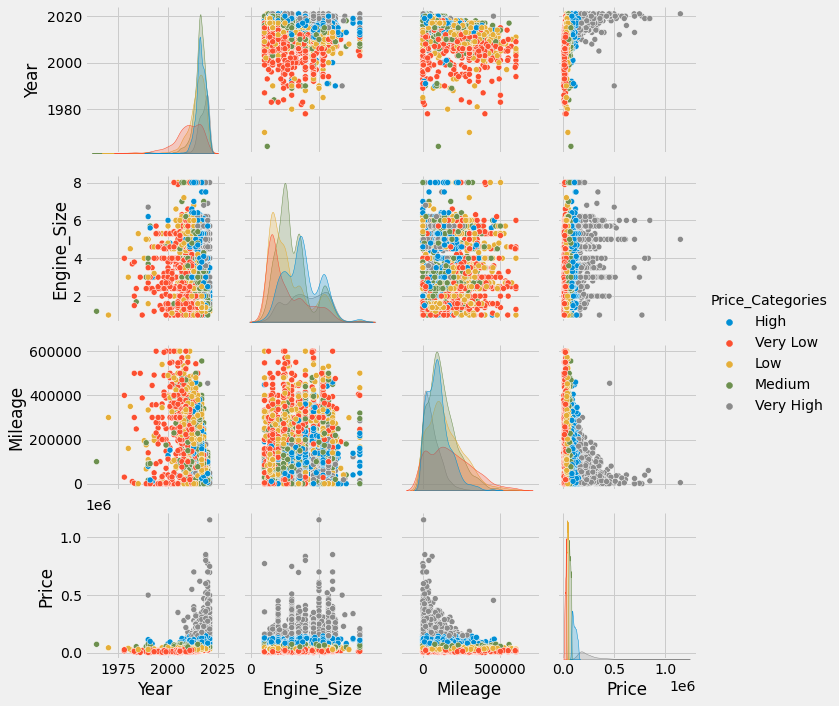

In [27]:
sns.pairplot(df,hue='Price_Categories')

### Visualizations

<AxesSubplot:xlabel='count', ylabel='Brand'>

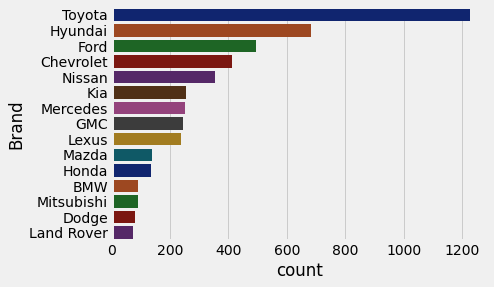

In [29]:
sns.countplot(y='Brand', data=df,palette='dark', order = df['Brand'].value_counts()[:15].index)

Toyota is the top brand in the market followed by Hyundai and Ford

<AxesSubplot:xlabel='count', ylabel='City'>

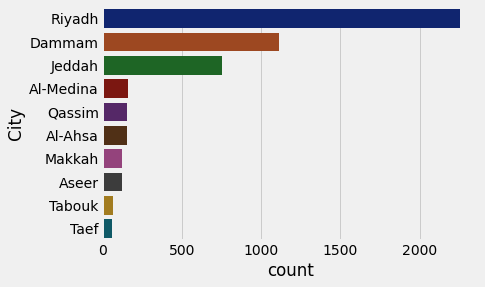

In [34]:
sns.countplot(y='City', data=df,palette='dark', order = df['City'].value_counts()[:10].index)

from this bar char we can see that the top city in car deals is Riyadh followed by Dammam and Jeddah

/Users/IbrahimCoding/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Car\nSpecs')

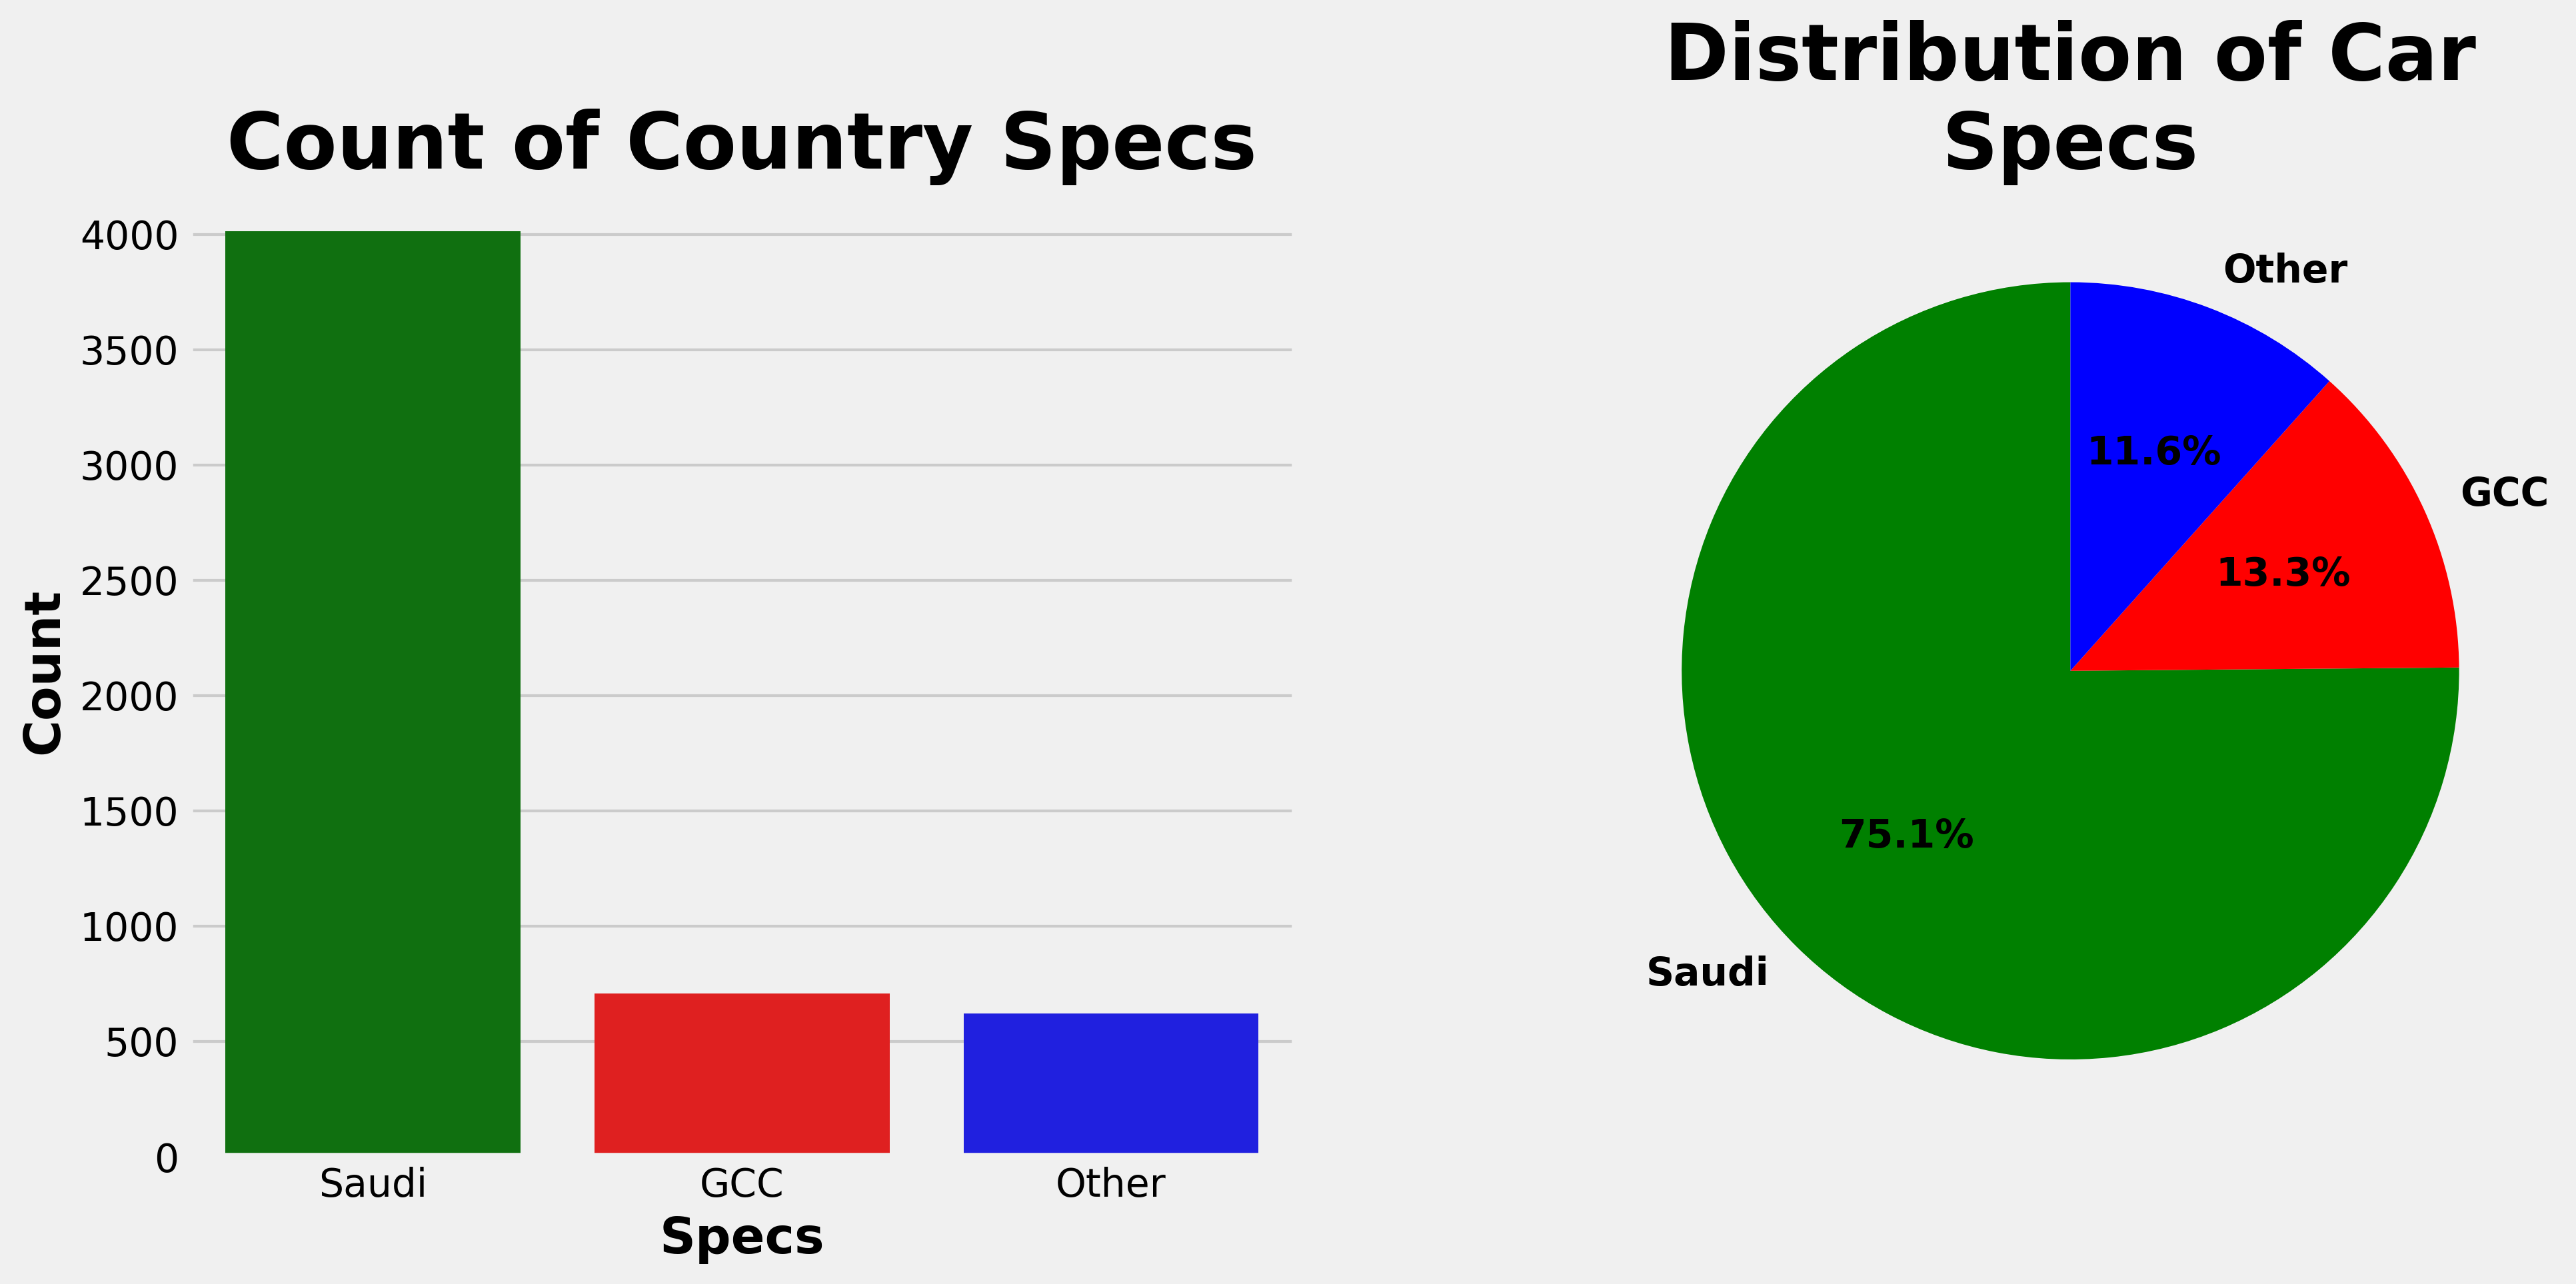

In [32]:
type_dict= df["Specs"].value_counts().to_dict()
type_label = type_dict.keys()
type_value = type_dict.values()
colors = ["green", "red", "blue"]
explode = (0, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(1,2, figsize=(14,6), dpi=300)
sns.countplot(df["Specs"], ax=ax[0],palette=["green", "red", "blue"])
ax[0].set_title("Count of Country Specs", size=28, fontweight="bold")
ax[0].set_xlabel("Specs", size=18, fontweight="bold")
ax[0].set_ylabel("Count", size=18, fontweight="bold")
plt.pie(type_value, explode=None, labels=type_label, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 14, "fontweight" : "bold"}, colors=colors)
plt.title("Distribution of Car\nSpecs", size=28, fontweight="bold")

> from these two plots that describe the origin of the car in terms of specs we can derive that 3/4 of the cars in the dataset are saudi as expected, the other two categorirs are cars imported from GCC countreis with 13.3% and cars from other countries with 11.6%. In additin for a breakdown of counts we can see in the histogram that cars from Saudi are almost 4,000.

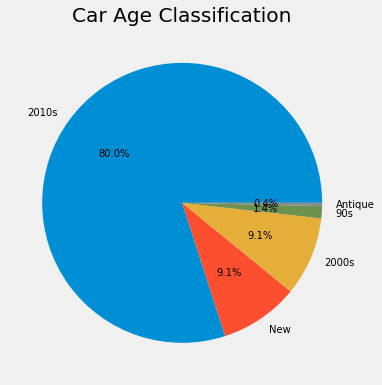

In [37]:
plt.figure(figsize=(15,6))
df['Car_Age'].value_counts().plot(kind='pie',autopct='%1.1f%%',ylabel="",
title="Car Age Classification",textprops = {"fontsize":10})
plt.show()


> from this pie plot we can deduce that 90% of the cars in the dataset are more than three years old. 80% are 2010s model follwoed by 9.2% new models (2020 and newer) and 9.1% are from 2000s and finally about 1% from 90s and less than 1% for antiques. 

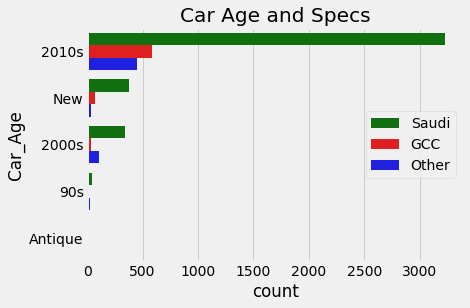

In [39]:
plt.title('Car Age and Specs')
ax=sns.countplot(y='Car_Age',hue='Specs',palette=['green','red','blue'],data=df)
plt.legend(loc = 5)
plt.show()

> From this plot we wanted to undersetand more the negotiable feature and relate it to other feature that we think it have a correaltion with. we found out 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Silver'),
  Text(3, 0, 'Grey'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Gold'),
  Text(6, 0, 'Brown'),
  Text(7, 0, 'Red'),
  Text(8, 0, 'Blue'),
  Text(9, 0, 'Navy')])

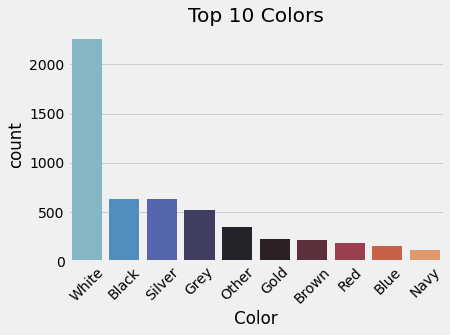

In [40]:
sns.countplot(x='Color',data=df, palette='icefire', 
order = df['Color'].value_counts()[:10].index).set(title='Top 10 Colors')
plt.xticks(rotation=45)

Top color in the market is white followed bt black and silver

[Text(0.5, 1.0, 'Top 15 Models')]

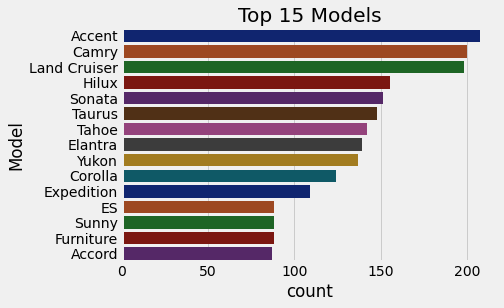

In [41]:
sns.countplot(y='Model', data=df,palette='dark',
order = df['Model'].value_counts()[:15].index).set(title='Top 15 Models')

Top model in the market is Accent from Hyundai followd by Camry and Lanc Cruiser from Toyota

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Land Cruiser'),
  Text(1, 0, 'ES'),
  Text(2, 0, 'Tahoe'),
  Text(3, 0, 'Yukon'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Hilux'),
  Text(6, 0, 'Taurus'),
  Text(7, 0, 'Accord'),
  Text(8, 0, 'Expedition'),
  Text(9, 0, 'Sonata'),
  Text(10, 0, 'Camry'),
  Text(11, 0, 'Elantra'),
  Text(12, 0, 'Corolla'),
  Text(13, 0, 'Accent'),
  Text(14, 0, 'Sunny')])

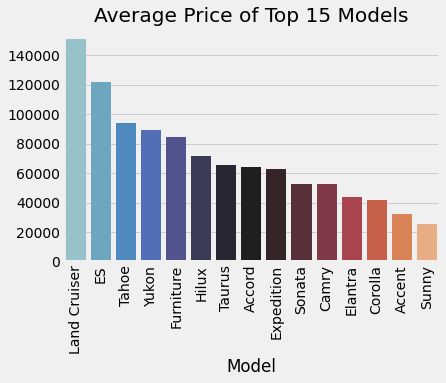

In [55]:
Top15Models=df['Model'].value_counts()[:15].index
dfTop15Models=df[['Model','Price']]
dfTop15Models= dfTop15Models[dfTop15Models.Model.isin(Top15Models)]
dfTop15Models=dfTop15Models.groupby(['Model'])['Price'].mean().sort_values(ascending = False)
sns.barplot(x=dfTop15Models.index,y=dfTop15Models.values, palette='icefire').set(title='Average Price of Top 15 Models')
plt.xticks(rotation=90)

The highest price here is Land Cruiser with an average price of 145,000 SAR followed by Lexust ES 120,000 SAR and then Chevrolet Tahoe 95,000 SAR

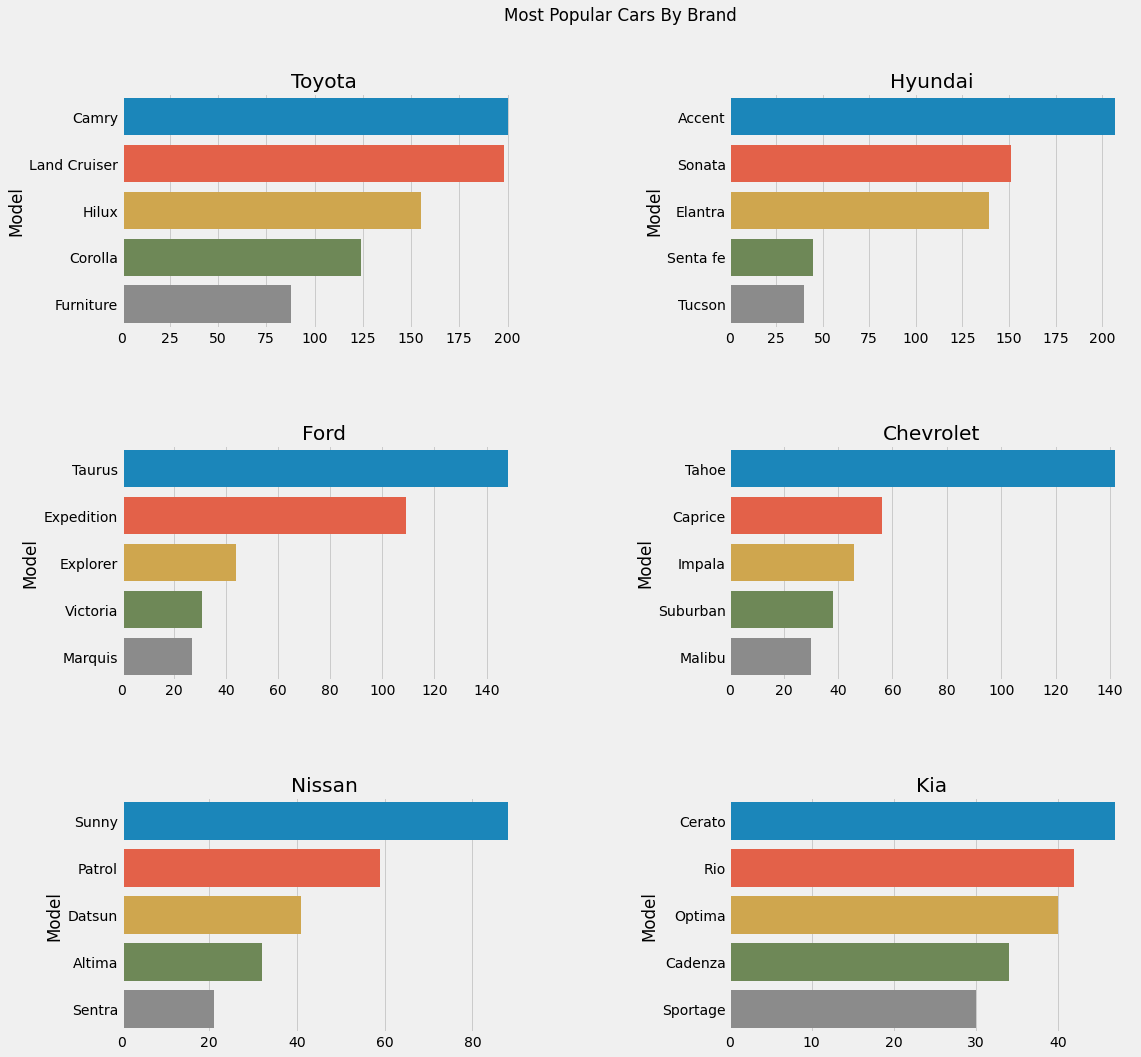

In [43]:
#get top 6 cars
df[['Brand', 'Model']]['Brand'].value_counts()[:6]
df_topcar = df[['Brand', 'Model', 'Price', 'Year']]
df_topcar = df_topcar[df_topcar['Brand'].isin(['Toyota', 'Hyundai', 'Ford', 
            'Chevrolet', 'Nissan','Kia'])]

fig, axes = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Most Popular Cars By Brand')
fig.tight_layout()
fig.subplots_adjust(top=0.9, wspace=0.5, hspace=0.5)

df_Toyota = df_topcar[df_topcar['Brand'] == 'Toyota']
sns.countplot(ax=axes[0][0], data = df_Toyota, y ='Model', order = pd.value_counts(df_Toyota['Model']).iloc[:5].index )
axes[0][0].set_title('Toyota')
axes[0][0].set(xlabel='', ylabel='Model')


df_Hyundai = df_topcar[df_topcar['Brand'] == 'Hyundai']
sns.countplot(ax=axes[0][1], data = df_Hyundai, y ='Model', order = pd.value_counts(df_Hyundai['Model']).iloc[:5].index )
axes[0][1].set_title('Hyundai')
axes[0][1].set(xlabel='', ylabel='Model')


df_Ford = df_topcar[df_topcar['Brand'] == 'Ford']
sns.countplot(ax=axes[1][0], data = df_Ford, y ='Model', order = pd.value_counts(df_Ford['Model']).iloc[:5].index )
axes[1][0].set_title('Ford')
axes[1][0].set(xlabel='', ylabel='Model')


df_Chevrolet = df_topcar[df_topcar['Brand'] == 'Chevrolet']
sns.countplot(ax=axes[1][1], data = df_Chevrolet, y ='Model', order = pd.value_counts(df_Chevrolet['Model']).iloc[:5].index )
axes[1][1].set_title('Chevrolet')
axes[1][1].set(xlabel='', ylabel='Model')


df_Nissan = df_topcar[df_topcar['Brand'] == 'Nissan']
sns.countplot(ax=axes[2][0], data = df_Nissan, y ='Model', order = pd.value_counts(df_Nissan['Model']).iloc[:5].index )
axes[2][0].set_title('Nissan')
axes[2][0].set(xlabel='', ylabel='Model');


df_Kia = df_topcar[df_topcar['Brand'] == 'Kia']
sns.countplot(ax=axes[2][1], data = df_Kia, y ='Model', order = pd.value_counts(df_Kia['Model']).iloc[:5].index )
axes[2][1].set_title('Kia')
axes[2][1].set(xlabel='', ylabel='Model');




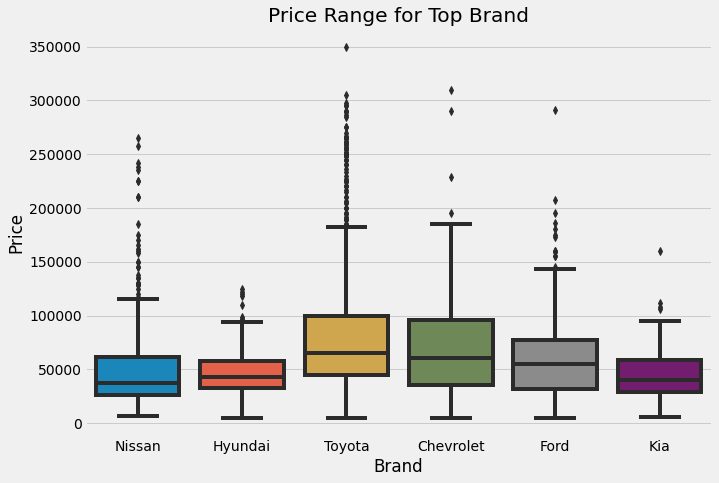

In [44]:
plt.figure(figsize=(10,7))
plt.title('Price Range for Top Brand')
boxplot = sns.boxplot(data = df_topcar, x='Brand', y ='Price')
boxplot.set(xlabel='Brand', ylabel='Price');
#plt.savefig('test.png') 

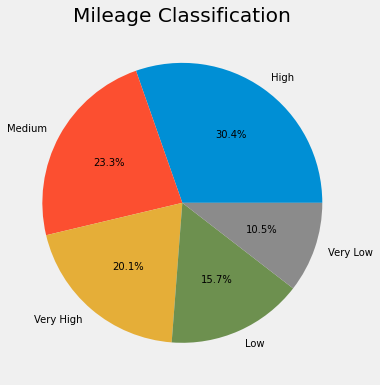

In [58]:
plt.figure(figsize=(15,6))
df['Mileage_Classfication'].value_counts().plot(kind='pie',autopct='%1.1f%%',
title="Mileage Classification",textprops = {"fontsize":10},ylabel="")#,labels='<5',"a","b","a","r"),
plt.show()


> From this pie chart we can derive that 30% of the cars in the dataset are high in mileage between 100k km and 200k km and the medium range second in percentage with 23%. The very high >200k km comes third with 20% and the low and very low all have a percentage of 26%.

'Very Low' if Mileage <=5_000 
'Low' if Mileage <=50_000
'Medium'if Mileage <=100_000
'High' if Mileage <=200_000 
else "Very High"

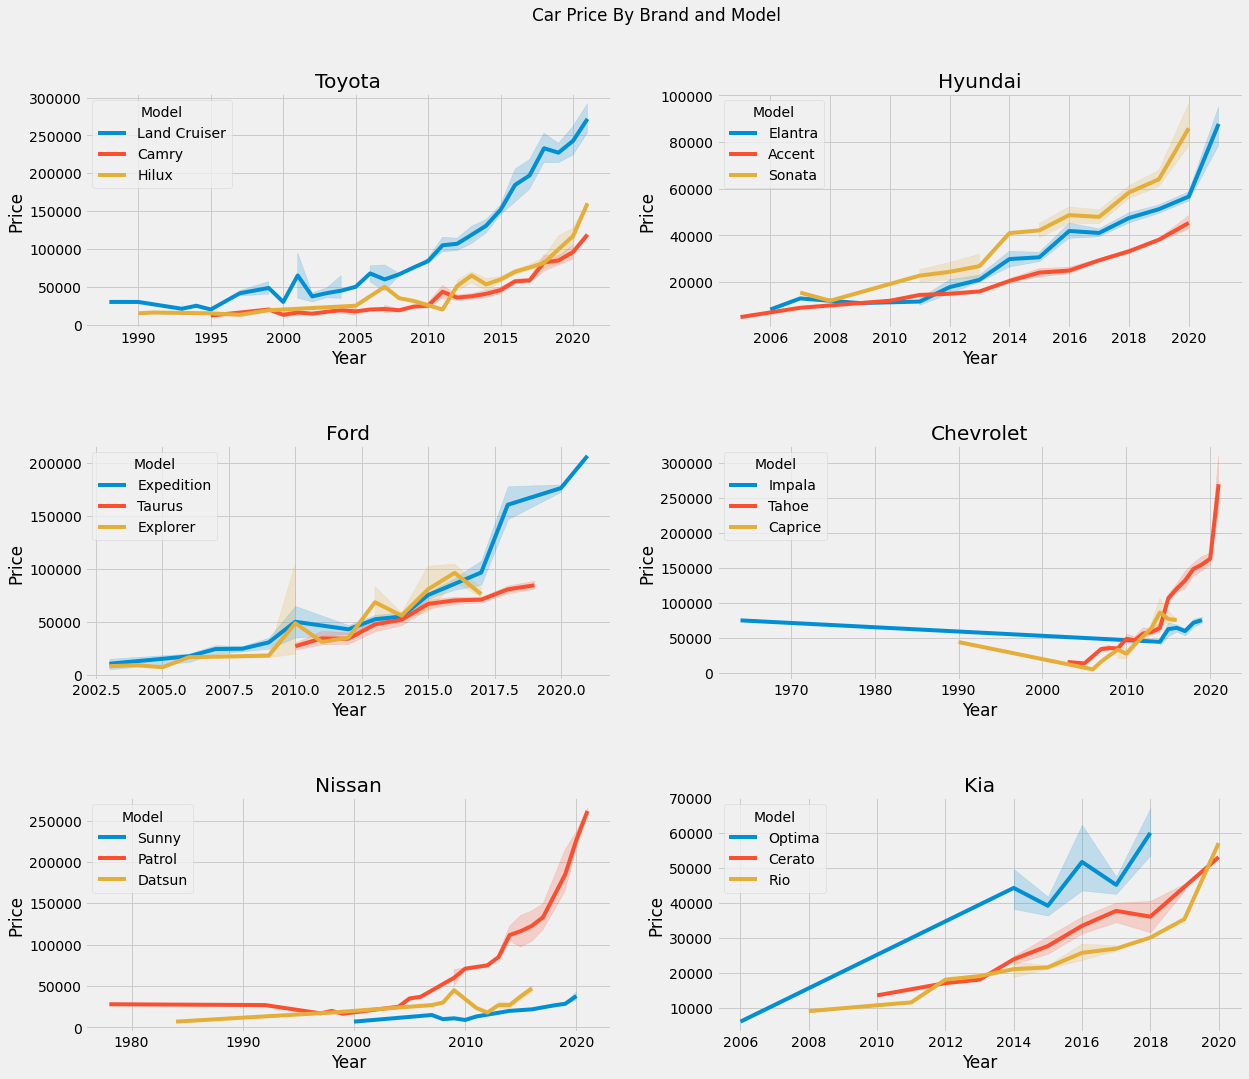

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(17,15))
fig.suptitle('Car Price By Brand and Model')
fig.tight_layout()
fig.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5)

df_Toyota = df[df['Brand'] == 'Toyota']
Toyota_top = df_Toyota[df_Toyota['Model'].isin(['Camry', 'Land Cruiser', 'Hilux'])]
sns.lineplot(ax=axes[0][0], data=Toyota_top, x="Year", y="Price", hue = 'Model')
axes[0][0].set_title('Toyota')
axes[0][0].set(xlabel='Year', ylabel='Price')
axes[0][0].legend(title='Model')


df_Hyundai = df[df['Brand'] == 'Hyundai']
Hyundai_top = df_Hyundai[df_Hyundai['Model'].isin(['Accent', 'Sonata', 'Elantra'])]
sns.lineplot(ax=axes[0][1], data=Hyundai_top, x="Year", y="Price", hue = 'Model')
axes[0][1].set_title('Hyundai')
axes[0][1].set(xlabel='Year', ylabel='Price')
axes[0][1].legend(title='Model')


df_Ford = df[df['Brand'] == 'Ford']
Ford_top = df_Ford[df_Ford['Model'].isin(['Taurus', 'Expedition', 'Explorer'])]
sns.lineplot(ax=axes[1][0], data=Ford_top, x="Year", y="Price", hue = 'Model')
axes[1][0].set_title('Ford')
axes[1][0].set(xlabel='Year', ylabel='Price')
axes[1][0].legend(title='Model')



df_Chevrolet = df[df['Brand'] == 'Chevrolet']
Chevrolet_top = df_Chevrolet[df_Chevrolet['Model'].isin(['Tahoe', 'Caprice', 'Impala'])]
sns.lineplot(ax=axes[1][1], data=Chevrolet_top, x="Year", y="Price", hue = 'Model')
axes[1][1].set_title('Chevrolet')
axes[1][1].set(xlabel='Year', ylabel='Price')
axes[1][1].legend(title='Model')


df_Nissan = df[df['Brand'] == 'Nissan']
Nissan_top = df_Nissan[df_Nissan['Model'].isin(['Sunny', 'Patrol', 'Datsun'])]
sns.lineplot(ax=axes[2][0], data=Nissan_top, x="Year", y="Price", hue = 'Model')
axes[2][0].set_title('Nissan')
axes[2][0].set(xlabel='Year', ylabel='Price')
axes[2][0].legend(title='Model')


df_Kia = df[df['Brand'] == 'Kia']
Kia_top = df_Kia[df_Kia['Model'].isin(['Cerato', 'Optima', 'Rio'])]
sns.lineplot(ax=axes[2][1], data=Kia_top, x="Year", y="Price", hue = 'Model')
axes[2][1].set_title('Kia')
axes[2][1].set(xlabel='Year', ylabel='Price')
axes[2][1].legend(title='Model');


# Machine Learning

## Regression ML

> Our target is to predict the price of the car and use the negotiable deals seprated at the beginning for prediection

### Regression Preperation

In [60]:
df.shape

(5341, 17)

In [61]:
dfr = df[df.Price >0]
dfr.shape

(5341, 17)

now we create dummies for nominal categorical columns 

In [63]:
dfr = pd.get_dummies(dfr, columns=['Brand','Color','City','Specs',
                                   'Fuel_Type','Gear_Type'])
dfr.shape

(5341, 115)

> Here we transform variables for ordinal categorical columns

We set the order for encoding from small to big, old to new
Options = ['Standard','Semi Full','Full']
Car_Age = ['Antique', '90s', '2000s', '2010s','New']
Mileage_Classfication = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
Engine_Classification = ['Small', 'Medium', 'Big']

In [64]:
dfr['Options'] = dfr['Options'].replace('Standard',0)
dfr['Options'] = dfr['Options'].replace('Semi Full',1)
dfr['Options'] = dfr['Options'].replace('Full',2)

dfr['Car_Age'] = dfr['Car_Age'].replace('Antique',0)
dfr['Car_Age'] = dfr['Car_Age'].replace('90s',1)
dfr['Car_Age'] = dfr['Car_Age'].replace('2000s',2)
dfr['Car_Age'] = dfr['Car_Age'].replace('2010s',3)
dfr['Car_Age'] = dfr['Car_Age'].replace('New',4)

dfr['Mileage_Classfication'] = dfr['Mileage_Classfication'].replace('Very Low',0)
dfr['Mileage_Classfication'] = dfr['Mileage_Classfication'].replace('Low',1)
dfr['Mileage_Classfication'] = dfr['Mileage_Classfication'].replace('Medium',2)
dfr['Mileage_Classfication'] = dfr['Mileage_Classfication'].replace('High',3)
dfr['Mileage_Classfication'] = dfr['Mileage_Classfication'].replace('Very High',5)

dfr['Engine_Classification'] = dfr['Engine_Classification'].replace('Small',0)
dfr['Engine_Classification'] = dfr['Engine_Classification'].replace('Medium',1)
dfr['Engine_Classification'] = dfr['Engine_Classification'].replace('Big',2)

In [65]:
dfr.describe()

,Year,Options,Engine_Size,Mileage,Price,Car_Age,Mileage_Classfication,Engine_Classification,Brand_Aston Martin,Brand_Audi,...,City_Wadi Dawasir,City_Yanbu,Specs_GCC,Specs_Other,Specs_Saudi,Fuel_Type_Diesel,Fuel_Type_Gas,Fuel_Type_Hybrid,Gear_Type_Automatic,Gear_Type_Manual
count,5341.000000,5341.000000,5341.000000,5341.000000,5.341000e+03,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,...,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000,5341.000000
mean,2014.881857,1.030706,3.167703,126016.177308,7.996885e+04,2.960869,2.539038,1.035199,0.000562,0.006928,...,0.000936,0.003745,0.132559,0.116083,0.751357,0.015540,0.982775,0.001685,0.899083,0.100917
std,4.957619,0.855141,1.435569,106679.924574,7.499932e+04,0.520519,1.547930,0.798334,0.023696,0.082951,...,0.030585,0.061084,0.339130,0.320355,0.432267,0.123699,0.130122,0.041019,0.301248,0.301248
min,1964.000000,0.000000,1.000000,100.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.000000,2.000000,48000.000000,3.650000e+04,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2016.000000,1.000000,2.700000,101364.000000,5.900000e+04,3.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2018.000000,2.000000,4.000000,180000.000000,9.500000e+04,3.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2021.000000,2.000000,8.000000,600000.000000,1.150000e+06,4.000000,5.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
corr = dfr.corr()
corr.style.background_gradient(cmap='coolwarm')

In [67]:
lst = abs(corr.loc['Price'])
price_corr = pd.DataFrame(lst)
price_corr.rename(columns={'Price':'Price_Correlation'}, inplace=True)
price_corr = price_corr.sort_values(by="Price_Correlation",ascending=False)
price_corr.drop(price_corr.index[0], inplace=True) #dropping price row
price_corr.style.background_gradient(cmap='inferno')

,Price_Correlation
Car_Age,0.339822
Options,0.332728
Year,0.330402
Engine_Size,0.311092
Mileage,0.289004
Engine_Classification,0.280555
Mileage_Classfication,0.274251
Brand_Mercedes,0.273474
Brand_Land Rover,0.267326
Brand_Lexus,0.260690


from the last heat map we can derive that the top 5 columns with the highest correlation are:
Car_Age      0.339822
Options      0.332728
Year	     0.330402
Engine_Size	 0.311092
Mileage      0.289004

### Splitting the data

In [111]:
#Create the target and features to split
target = "Price"
feature = ["Car_Age","Options","Year","Engine_Size",'Mileage']     

X = dfr[feature]
y = dfr[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

###  Models

In [120]:
#### 1st Regression Model: Multiple Linear Regression
multi_linear = LinearRegression()
multi_linear.fit(X_train, y_train)
multi_linear.intercept_
multi_linear.coef_
multi_linear_preds = multi_linear.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=multi_linear_preds)

#### 2nd Regression Model: Decision Tree
DTregressor = DecisionTreeRegressor(max_depth=5 , min_samples_split=2, random_state=42)
DTregressor.fit(X_train,y_train)
DTregressor_preds=DTregressor.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=DTregressor_preds)

#### 3rd Regression Model: Random Forest
RFregressor = RandomForestRegressor(n_estimators = 90, random_state = 42)
RFregressor.fit(X_train,y_train)
RFregressor_preds=RFregressor.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=RFregressor_preds)

#### 4th Regression Model: Gradient Boosting
params = {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error'}
GBoosting = GradientBoostingRegressor(**params)
GBoosting.fit(X_train, y_train)
GBoosting_preds=GBoosting.predict(X_test)
GBoosting_preds= GBoosting_preds.reshape(-1,1)

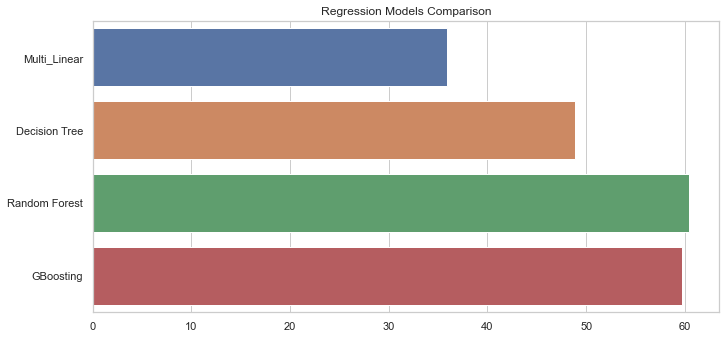

In [116]:
Regression_Score = [100*r2_score(y_test,multi_linear_preds),100*r2_score(y_test,DTregressor_preds),
                    100*r2_score(y_test,RFregressor_preds),100*r2_score(y_test,GBoosting_preds)]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=['Multi_Linear','Decision Tree','Random Forest','GBoosting'],#'SVR'], 
                 x=Regression_Score).set(title='Regression Models Comparison')


Our best two models are Random Forest and GBoosting but results not well enough for predection <90.

### Hypertuning and evaluation

In [117]:
scaler= StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [119]:
#### 3rd Regression Model: Random Forest
RFregressor = RandomForestRegressor(n_estimators = 90, random_state = 42)
RFregressor.fit(X_train_scale,y_train)
RFregressor_preds2=RFregressor.predict(X_test_scale)
mean_absolute_error(y_true=y_test, y_pred=RFregressor_preds)

#### 4th Regression Model: Gradient Boosting
params = {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error'}
GBoosting = GradientBoostingRegressor(**params)
GBoosting.fit(X_train_scale, y_train)
GBoosting_preds2=GBoosting.predict(X_test_scale)
GBoosting_preds2= GBoosting_preds.reshape(-1,1)

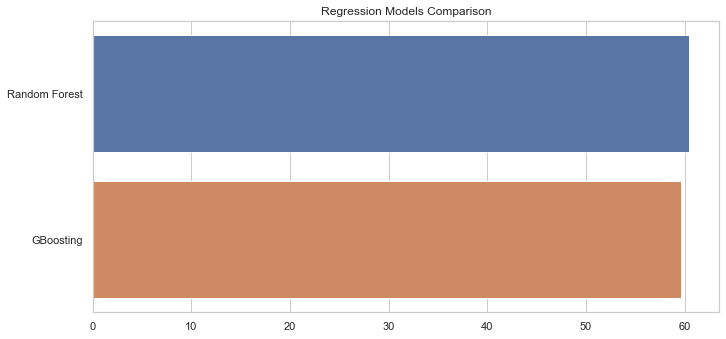

In [122]:
Regression_Score2 = [100*r2_score(y_test,RFregressor_preds2),
                     100*r2_score(y_test,GBoosting_preds2)]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=['Random Forest','GBoosting'], 
                 x=Regression_Score2).set(title='Regression Models Comparison')


In [133]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_scale, y_train)
rf_random_preds=rf_random.predict(X_test_scale)
# Fit the random search model
# RFregressor.fit(X_train_scale,y_train)
# RFregressor_preds2=RFregressor.predict(X_test_scale)
# mean_absolute_error(y_true=y_test, y_pred=RFregressor_preds)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [129]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [137]:
100*r2_score(y_test,rf_random_preds)

58.96332052076567

## Classification Models

> To predict the nature of the deal negotiable or not we are going to arrange the data to be able to model it for that goal

### Classfication Preperation

#### General

In [76]:
#Deleting the price column and changing the price classfication for negotatiable deals
dfc1 = df1.drop(['Price'], axis=1)
dfc1 = dfc1.rename(columns={"Price_Categories": "Negotiable"})
Negotiable = dfc1['Negotiable'].map(
    lambda deal: True if deal == "Negotiable" else False)
dfc1['Negotiable']=Negotiable
dfc1['Negotiable'].value_counts('normalize')

False    0.685975
True     0.314025
Name: Negotiable, dtype: float64

In [77]:
#we set the regions in ordinal order from small to big in terms of market share
dfc1['Region'] = dfc1['Region'].replace('North',0)
dfc1['Region'] = dfc1['Region'].replace('South',1)
dfc1['Region'] = dfc1['Region'].replace('East',2)
dfc1['Region'] = dfc1['Region'].replace('West',3)
dfc1['Region'] = dfc1['Region'].replace('Center',5)

dfc1['Options'] = dfc1['Options'].replace('Standard',0)
dfc1['Options'] = dfc1['Options'].replace('Semi Full',1)
dfc1['Options'] = dfc1['Options'].replace('Full',2)

dfc1['Car_Age'] = dfc1['Car_Age'].replace('Antique',0)
dfc1['Car_Age'] = dfc1['Car_Age'].replace('90s',1)
dfc1['Car_Age'] = dfc1['Car_Age'].replace('2000s',2)
dfc1['Car_Age'] = dfc1['Car_Age'].replace('2010s',3)
dfc1['Car_Age'] = dfc1['Car_Age'].replace('New',4)

dfc1['Mileage_Classfication'] = dfc1['Mileage_Classfication'].replace('Very Low',0)
dfc1['Mileage_Classfication'] = dfc1['Mileage_Classfication'].replace('Low',1)
dfc1['Mileage_Classfication'] = dfc1['Mileage_Classfication'].replace('Medium',2)
dfc1['Mileage_Classfication'] = dfc1['Mileage_Classfication'].replace('High',3)
dfc1['Mileage_Classfication'] = dfc1['Mileage_Classfication'].replace('Very High',5)

dfc1['Engine_Classification'] = dfc1['Engine_Classification'].replace('Small',0)
dfc1['Engine_Classification'] = dfc1['Engine_Classification'].replace('Medium',1)
dfc1['Engine_Classification'] = dfc1['Engine_Classification'].replace('Big',2)

In [76]:
dfc1.describe()

,Year,Options,Engine_Size,Mileage,Car_Age,Mileage_Classfication,Engine_Classification,Region
count,7786.000000,7786.000000,7786.000000,7786.000000,7786.000000,7786.000000,7786.000000,7786.000000
mean,2014.182635,1.071410,3.271243,129957.786797,2.908554,2.525302,1.094786,3.386206
std,5.573383,0.847702,1.470363,116333.291425,0.584195,1.654853,0.795947,1.603131
min,1964.000000,0.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.000000,2.000000,38000.000000,3.000000,1.000000,0.000000,2.000000
50%,2016.000000,1.000000,3.000000,102000.000000,3.000000,3.000000,1.000000,3.000000
75%,2018.000000,2.000000,4.200000,192698.000000,3.000000,3.000000,2.000000,5.000000
max,2022.000000,2.000000,8.000000,600000.000000,4.000000,5.000000,2.000000,5.000000


In [77]:
dfc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786 entries, 0 to 8033
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  7786 non-null   object 
 1   Model                  7786 non-null   object 
 2   Year                   7786 non-null   int64  
 3   Specs                  7786 non-null   object 
 4   Color                  7786 non-null   object 
 5   Options                7786 non-null   int64  
 6   Engine_Size            7786 non-null   float64
 7   Fuel_Type              7786 non-null   object 
 8   Gear_Type              7786 non-null   object 
 9   Mileage                7786 non-null   int64  
 10  City                   7786 non-null   object 
 11  Car_Age                7786 non-null   int64  
 12  Mileage_Classfication  7786 non-null   int64  
 13  Engine_Classification  7786 non-null   int64  
 14  Region                 7786 non-null   int64  
 15  Nego

In [78]:
dfc1 = pd.get_dummies(dfc1, columns=['Specs','Fuel_Type','Gear_Type'])
dfc1.shape

(7786, 21)

In [79]:
corr = dfc1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Options,Engine_Size,Mileage,Car_Age,Mileage_Classfication,Engine_Classification,Region,Negotiable,Specs_GCC,Specs_Other,Specs_Saudi,Fuel_Type_Diesel,Fuel_Type_Gas,Fuel_Type_Hybrid,Gear_Type_Automatic,Gear_Type_Manual
Year,1.000000,-0.069181,-0.243730,-0.378951,0.880878,-0.259101,-0.239199,0.123405,-0.185437,0.055599,-0.175985,0.093475,0.016732,-0.029280,0.037948,0.230210,-0.230210
Options,-0.069181,1.000000,0.270542,-0.024840,-0.028054,-0.038281,0.269630,-0.070676,0.070974,0.126210,0.118466,-0.187420,-0.005575,0.001379,0.010692,0.066297,-0.066297
Engine_Size,-0.243730,0.270542,1.000000,0.144889,-0.171938,0.117465,0.890099,-0.038790,0.104084,0.017849,0.058823,-0.058962,-0.035904,0.039128,-0.015403,0.098778,-0.098778
Mileage,-0.378951,-0.024840,0.144889,1.000000,-0.349128,0.907910,0.156504,-0.018288,0.050081,-0.056442,0.020907,0.026811,-0.014205,0.023856,-0.029426,-0.118246,0.118246
Car_Age,0.880878,-0.028054,-0.171938,-0.349128,1.000000,-0.257764,-0.174731,0.095869,-0.132363,0.044528,-0.158569,0.088461,0.024361,-0.035004,0.034006,0.195824,-0.195824
Mileage_Classfication,-0.259101,-0.038281,0.117465,0.907910,-0.257764,1.000000,0.127687,0.005492,-0.012269,-0.050468,0.010606,0.030214,-0.022054,0.030275,-0.026844,-0.053344,0.053344
Engine_Classification,-0.239199,0.269630,0.890099,0.156504,-0.174731,0.127687,1.000000,-0.046007,0.110652,0.034047,0.040203,-0.056921,-0.025782,0.024007,0.000332,0.014287,-0.014287
Region,0.123405,-0.070676,-0.038790,-0.018288,0.095869,0.005492,-0.046007,1.000000,-0.057359,0.042116,-0.055449,0.010738,-0.003216,0.001716,0.003602,0.118503,-0.118503
Negotiable,-0.185437,0.070974,0.104084,0.050081,-0.132363,-0.012269,0.110652,-0.057359,1.000000,-0.024574,0.066432,-0.032557,0.024463,-0.032155,0.025802,-0.120531,0.120531
Specs_GCC,0.055599,0.126210,0.017849,-0.056442,0.044528,-0.050468,0.034047,0.042116,-0.024574,1.000000,-0.148273,-0.646412,-0.019085,0.022074,-0.011738,-0.038341,0.038341


In [80]:
lst2 = abs(corr.loc['Negotiable'])
Neg_corr = pd.DataFrame(lst2)
Neg_corr = Neg_corr.sort_values(by="Negotiable",ascending=False)
Neg_corr.drop(Neg_corr.index[0], inplace=True) #dropping price row
Neg_corr.style.background_gradient(cmap='inferno')

,Negotiable
Year,0.185437
Car_Age,0.132363
Gear_Type_Automatic,0.120531
Gear_Type_Manual,0.120531
Engine_Classification,0.110652
Engine_Size,0.104084
Options,0.070974
Specs_Other,0.066432
Region,0.057359
Mileage,0.050081


#### Split 

In [81]:
#Create the target and features to split
target = "Negotiable"
feature = ['Year','Car_Age','Engine_Size','Engine_Classification']   

X = dfc1[feature]
y = dfc1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

### Models

In [82]:

####  Classification Model: Gradient Boosting
GBCModel = GradientBoostingClassifier(n_estimators=90, max_depth=4, learning_rate=0.1, random_state=44)
GBCModel.fit(X_train, y_train)
GBCModel_accuracy = GBCModel.score(X_test,y_test)
GBC_preds = GBCModel.predict(X_test)
GBCModel_report = classification_report(y_test,GBC_preds)

#### 2nd Classification Model: Random Forest
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=5, n_estimators=100, random_state=42)
RandomForestClassifierModel.fit(X_train, y_train)
RandomForestClassifierModel_accuracy = GBCModel.score(X_test,y_test)
RandomForestClassifierModel_preds = RandomForestClassifierModel.predict(X_test)
RandomForestClassifierModel_report = classification_report(y_test,RandomForestClassifierModel_preds)

#### 3rd Classification Model: Decision Tree Classifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
DecisionTreeClassifierModel.fit(X_train, y_train)
DecisionTreeClassifierModel_accuracy = DecisionTreeClassifierModel.score(X_test,y_test)
DecisionTreeClassifierModel_preds = DecisionTreeClassifierModel.predict(X_test)
DecisionTreeClassifierModel_report = classification_report(y_test,DecisionTreeClassifierModel_preds)

#### 4th Classification Model: KNN
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
knn_model_preds = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
knn_report = classification_report(y_test,knn_model_preds)

#### 5th Classification Model: SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc_preds = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
svc_report = classification_report(y_test,svc_preds)

/Users/IbrahimCoding/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/IbrahimCoding/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/IbrahimCoding/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

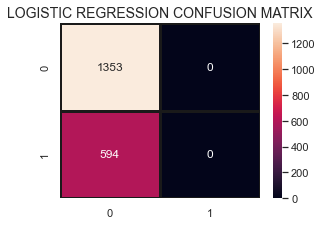

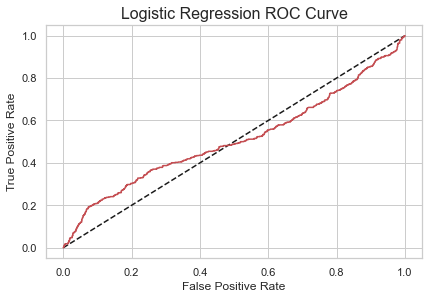

In [107]:
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

## Models Evaluation

In [83]:
#### 1st Classification Model:  Logistic Regression
# print("Logistic Regression accuracy is :",LR_accuracy)
# print(LR_report)

#### 1st Classification Model:  Gradient Boosting
print("Gradient Boosting accuracy is :",GBCModel_accuracy)
print(GBCModel_report)

#### 2nd Classification Model: Random Forest
print("Random Forest accuracy is :",RandomForestClassifierModel_accuracy)
print(RandomForestClassifierModel_report)


#### 3rd Classification Model: Decision Tree Classifier
print("Decision Tree accuracy is :",DecisionTreeClassifierModel_accuracy)
print(DecisionTreeClassifierModel_report)

#### 4th Classification Model: KNN
print("KNN accuracy is :",accuracy_knn)
print(knn_report)


#### 5th Classification Model: SVC
print("SVC accuracy is :",accuracy_svc)
print(svc_report)

Gradient Boosting accuracy is : 0.696969696969697
              precision    recall  f1-score   support

       False       0.72      0.93      0.81      1353
        True       0.51      0.16      0.25       594

    accuracy                           0.70      1947
   macro avg       0.61      0.55      0.53      1947
weighted avg       0.65      0.70      0.64      1947

Random Forest accuracy is : 0.696969696969697
              precision    recall  f1-score   support

       False       0.71      0.95      0.81      1353
        True       0.52      0.11      0.19       594

    accuracy                           0.70      1947
   macro avg       0.61      0.53      0.50      1947
weighted avg       0.65      0.70      0.62      1947

Decision Tree accuracy is : 0.689779147406266
              precision    recall  f1-score   support

       False       0.71      0.93      0.81      1353
        True       0.47      0.14      0.22       594

    accuracy                           0

### Hyperparameter for best model 

In [84]:
# Create param grid to hyper parameter tune the model
param_grid = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
}

grid = GridSearchCV(GBCModel, 
                    param_grid=param_grid, 
                    cv=10, # Cross Validation
                    verbose=1,
                    n_jobs=-1, 
                    scoring="accuracy"
                   )

grid.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


ValueError: Invalid parameter fit_intercept for estimator GradientBoostingClassifier(max_depth=4, n_estimators=90, random_state=44). Check the list of available parameters with `estimator.get_params().keys()`.

### Pipelines

In [ ]:
import transformers
from transformers import pipeline

for name, model in models:
    pipe =  make_pipeline([("transformer", transformers),
                     ("model", model)])

In [ ]:
#RandomUnderSampler(),
base_pipe = make_pipeline(
        LGBMClassifier(boosting_type='gbdt', n_estimators = 50, 
                       max_depth = 3, learning_rate= 0.3, is_unbalance = True)
    )

In [ ]:
operator_pipe =  make_pipeline([("transformer", transformers),
                     ("model", base_pipe)])

In [ ]:
scaler_pipe = make_pipeline([('scale', MinMaxScaler()), ('model', pipe)])

In [ ]:
base_pipe.fit(X_train,y_train)
base_pipe.score(X_test, y_test)